In [111]:
import pandas as pd
import spacy
from spacy.lang.en import English
from sklearn.metrics import classification_report


In [112]:
top_1960 = pd.read_csv("./df_1960.csv")
top_1970 = pd.read_csv("./df_1970.csv")
top_1980 = pd.read_csv("./df_1980.csv")
top_1990 = pd.read_csv("./df_1990.csv")
top_2000 = pd.read_csv("./df_2000.csv")
top_2010 = pd.read_csv("./df_2010.csv")
top_2020 = pd.read_csv("./df_2020.csv")

In [113]:
nlp = English()
stopwords_spaCy = nlp.Defaults.stop_words
eliminar = ["nt","oh","na","ca","ai","ta","wo","da","doo","la","gon","wan","pa","ah","n","r","en","är","som","att",
            "lo","el","du","se","por","gaj","jag","al","tu","ahha","vi","lip","ooh","de","chorus","u","que","real","si","pero","babe","una","soy","quiero"]
eliminar.extend(stopwords_spaCy)

top_1960 = top_1960[~top_1960['palabra'].isin(eliminar)]
top_1970 = top_1970[~top_1970['palabra'].isin(eliminar)]
top_1980 = top_1980[~top_1980['palabra'].isin(eliminar)]
top_1990 = top_1990[~top_1990['palabra'].isin(eliminar)]
top_2000 = top_2000[~top_2000['palabra'].isin(eliminar)]
top_2010 = top_2010[~top_2010['palabra'].isin(eliminar)]
top_2020 = top_2020[~top_2020['palabra'].isin(eliminar)]

ANALISIS MORFOSINTÁCTICO Y ORDENAMIENTO DE COLUMNAS

In [114]:
from nltk.corpus import stopwords
nlp = spacy.load("en_core_web_sm")
stopwords_ingles = set(stopwords.words('english'))

def categorizar_palabra(palabra):
    if palabra in stopwords_ingles:
        return "STOPWORD"

    doc = nlp(palabra)
    return doc[0].pos_


dataframes = [top_1960, top_1970, top_1980, top_1990, top_2000, top_2010, top_2020]

for df in dataframes:
    # Asegúrate de que todos los valores en 'palabra' sean strings
    df["palabra"] = df["palabra"].astype(str)
    df["categoria"] = df["palabra"].apply(categorizar_palabra)

for i in range(len(dataframes)):
    df = dataframes[i]
    cols = df.columns.tolist()
    cols.insert(1, cols.pop(cols.index('categoria')))
    dataframes[i] = df[cols]

top_1960, top_1970, top_1980, top_1990, top_2000, top_2010, top_2020 = dataframes

In [115]:
values = ["NOUN","ADJ"]
top_1960 = top_1960[top_1960.categoria.isin(values)]
top_1970 = top_1970[top_1970.categoria.isin(values)]
top_1980 = top_1980[top_1980.categoria.isin(values)]
top_1990 = top_1990[top_1990.categoria.isin(values)]
top_2000 = top_2000[top_2000.categoria.isin(values)]
top_2010 = top_2010[top_2010.categoria.isin(values)]
top_2020 = top_2020[top_2020.categoria.isin(values)]


ANALISIS DE DIFERENCIAS EN DECADAS DE PALABAS MAS COMUNES

-Se unen las bases de datos de las frecuencias de las 7 decadas unidas por medio de la variable "palabra"
-Se  crea una columna llamada "categoria" en donde se utiliza  la libreria spacy para categoriazar la morfosintactico de cada palabra para un posteriro filtrado.

In [116]:
import pandas as pd
from nltk.corpus import stopwords
import spacy

# Cargar el modelo de spaCy y las stopwords de NLTK
nlp = spacy.load("en_core_web_sm")
stopwords_ingles = set(stopwords.words('english'))

# Función para categorizar palabras
def categorizar_palabra(palabra):
    try:
        palabra = str(palabra)  # Asegurar que la palabra sea string
        if palabra.lower() in stopwords_ingles:
            return "STOPWORD"
        doc = nlp(palabra)
        return doc[0].pos_
    except Exception as e:
        return "UNKNOWN"

# Seleccionar solo las columnas "palabra" y "total", y renombrar "total" con la década correspondiente
top_1960 = top_1960[['palabra', 'total']].rename(columns={'total': 'total_1960'})
top_1970 = top_1970[['palabra', 'total']].rename(columns={'total': 'total_1970'})
top_1980 = top_1980[['palabra', 'total']].rename(columns={'total': 'total_1980'})
top_1990 = top_1990[['palabra', 'total']].rename(columns={'total': 'total_1990'})
top_2000 = top_2000[['palabra', 'total']].rename(columns={'total': 'total_2000'})
top_2010 = top_2010[['palabra', 'total']].rename(columns={'total': 'total_2010'})
top_2020 = top_2020[['palabra', 'total']].rename(columns={'total': 'total_2020'})

# Realizar merge sucesivo por la columna "palabra"
merged_df = top_1960.merge(top_1970, on='palabra', how='outer')\
                    .merge(top_1980, on='palabra', how='outer')\
                    .merge(top_1990, on='palabra', how='outer')\
                    .merge(top_2000, on='palabra', how='outer')\
                    .merge(top_2010, on='palabra', how='outer')\
                    .merge(top_2020, on='palabra', how='outer')

# Rellenar NaN con 0 si se desea
merged_df.fillna(0, inplace=True)

# Categorizar palabras en merged_df
merged_df["categoria"] = merged_df["palabra"].apply(categorizar_palabra)

# Reorganizar columnas para que "categoria" esté justo después de "palabra"
cols = merged_df.columns.tolist()
cols.insert(1, cols.pop(cols.index('categoria')))
merged_df = merged_df[cols]

# Mostrar el DataFrame resultante
print(merged_df.head())

# Guardar el DataFrame resultante en un archivo CSV
merged_df.to_csv('merged_decades.csv', index=False)

  palabra categoria  total_1960  total_1970  total_1980  total_1990  \
0    love      NOUN      6290.0      5980.0     11428.0      3192.0   
1    baby      NOUN      4580.0      2651.0      5838.0       945.0   
2    time      NOUN      2524.0      2030.0      4708.0      2301.0   
3     way      NOUN      1931.0      1573.0      2779.0      1554.0   
4     day      NOUN      1871.0      1181.0      2585.0      1079.0   

   total_2000  total_2010  total_2020  
0      6254.0      6266.0      5052.0  
1      4151.0      3344.0      4550.0  
2      3728.0      3096.0      2339.0  
3      3269.0      2277.0      1881.0  
4      1630.0      1152.0       858.0  


In [159]:
merged_df = pd.read_csv("./merged_decades.csv")
merged_df = merged_df.drop(columns=["categoria"])


In [212]:
merged_df

,palabra,total_1960,total_1970,total_1980,total_1990,total_2000,total_2010,total_2020
0,love,6290.0,5980.0,11428.0,3192.0,6254.0,6266.0,5052.0
1,baby,4580.0,2651.0,5838.0,945.0,4151.0,3344.0,4550.0
2,time,2524.0,2030.0,4708.0,2301.0,3728.0,3096.0,2339.0
3,way,1931.0,1573.0,2779.0,1554.0,3269.0,2277.0,1881.0
4,day,1871.0,1181.0,2585.0,1079.0,1630.0,1152.0,858.0
...,...,...,...,...,...,...,...,...
42567,persea,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42568,extrañando,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42569,gruñon,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42570,llegochile,0.0,0.0,0.0,0.0,0.0,0.0,1.0


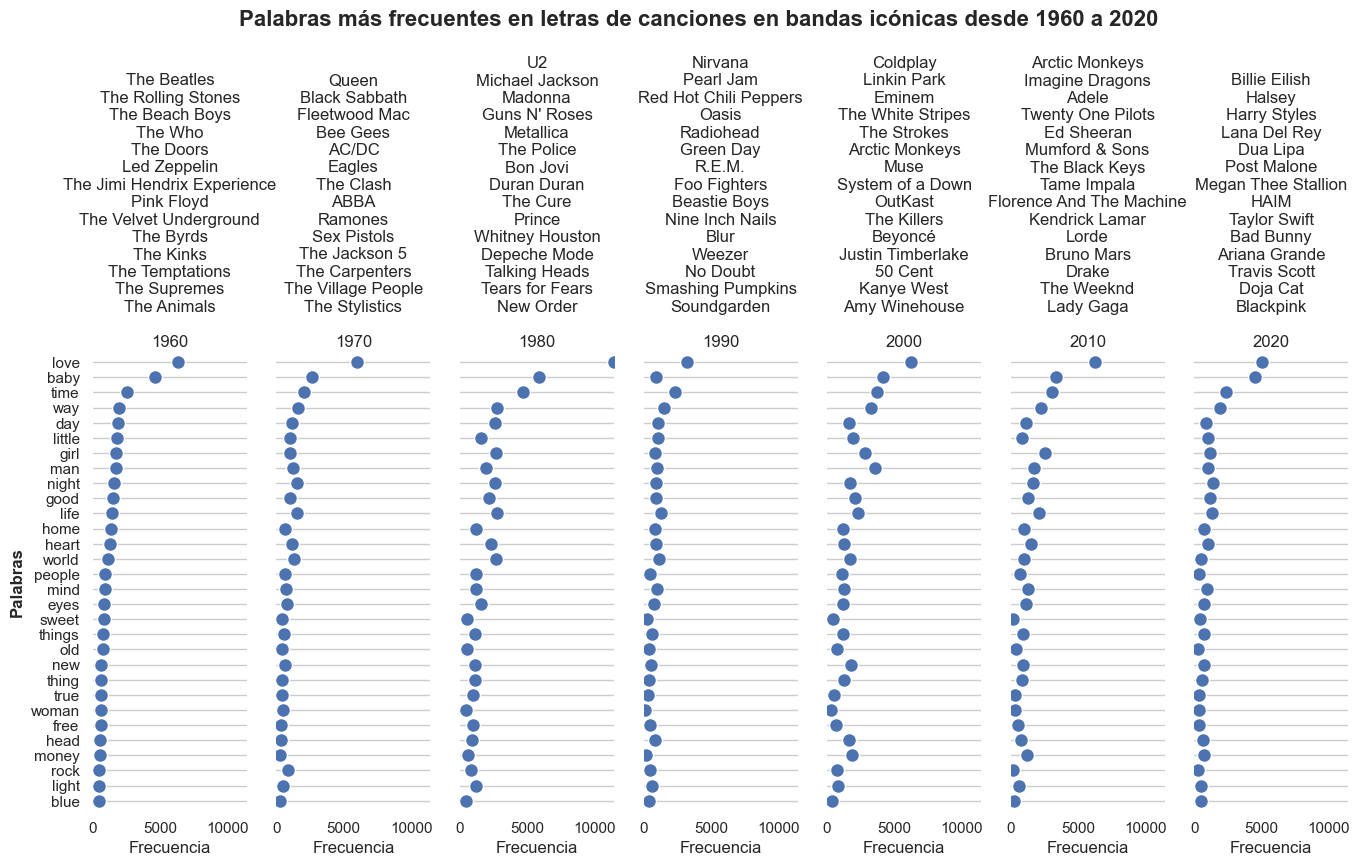

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Seleccionar las primeras palabras para un gráfico más claro (puedes ajustar el número según sea necesario)
top_words = merged_df.head(30)

# Configurar el tema de seaborn
sns.set_theme(style="whitegrid")

# Crear el PairGrid
g = sns.PairGrid(top_words.sort_values("total_1960", ascending=False),
                 x_vars=top_words.columns[1:], y_vars=["palabra"],
                 height=15, aspect=.13)

# Dibujar un gráfico de puntos usando stripplot
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Ajustar límites del eje x y etiquetas
g.set(xlim=(0, top_words.iloc[:, 1:].max().max()), xlabel="Frecuencia")

# Usar títulos semánticos para las columnas
titles = ["\nThe Beatles\nThe Rolling Stones\nThe Beach Boys\nThe Who\nThe Doors\nLed Zeppelin\nThe Jimi Hendrix Experience\nPink Floyd\nThe Velvet Underground\nThe Byrds\nThe Kinks\nThe Temptations\nThe Supremes\nThe Animals\n\n1960", 
        "\nQueen\nBlack Sabbath\nFleetwood Mac\nBee Gees\nAC/DC\nEagles\nThe Clash\nABBA\nRamones\nSex Pistols\nThe Jackson 5\nThe Carpenters\nThe Village People\nThe Stylistics\n\n1970",
        "\nU2\nMichael Jackson\nMadonna\nGuns N' Roses\nMetallica\nThe Police\nBon Jovi\nDuran Duran\nThe Cure\nPrince\nWhitney Houston\nDepeche Mode\nTalking Heads\nTears for Fears\nNew Order\n\n1980",
        "\nNirvana\nPearl Jam\nRed Hot Chili Peppers\nOasis\nRadiohead\nGreen Day\nR.E.M.\nFoo Fighters\nBeastie Boys\nNine Inch Nails\nBlur\nWeezer\nNo Doubt\nSmashing Pumpkins\nSoundgarden\n\n1990",
        "\nColdplay\nLinkin Park\nEminem\nThe White Stripes\nThe Strokes\nArctic Monkeys\nMuse\nSystem of a Down\nOutKast\nThe Killers\nBeyoncé\nJustin Timberlake\n50 Cent\nKanye West\nAmy Winehouse\n\n2000",
        "\nArctic Monkeys\nImagine Dragons\nAdele\nTwenty One Pilots\nEd Sheeran\nMumford & Sons\nThe Black Keys\nTame Impala\nFlorence And The Machine\nKendrick Lamar\nLorde\nBruno Mars\nDrake\nThe Weeknd\nLady Gaga\n\n2010", 
        "\nBillie Eilish\nHalsey\nHarry Styles\nLana Del Rey\nDua Lipa\nPost Malone\nMegan Thee Stallion\nHAIM\nTaylor Swift\nBad Bunny\nAriana Grande\nTravis Scott\nDoja Cat\nBlackpink\n\n2020"]

for ax, title in zip(g.axes.flat, titles):
    # Establecer un título diferente para cada eje
    ax.set(title=title)
    # Hacer que la cuadrícula sea horizontal en lugar de vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    # Establecer el eje y en negrita
    ax.yaxis.set_label_text("Palabras", weight='bold')

# Ajustar los márgenes para mostrar los títulos correctamente
plt.subplots_adjust(top=0.35)
plt.suptitle("Palabras más frecuentes en letras de canciones en bandas icónicas desde 1960 a 2020", fontsize=16, fontweight='bold', y=0.58)

# Eliminar las líneas superiores e izquierdas del gráfico
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()



In [191]:
percentage_df = merged_df.iloc[:, 1:].apply(lambda x: (x / x.sum()) * 100)

# Agregar la columna 'palabra' al DataFrame percentage_df
percentage_df['palabra'] = merged_df['palabra']

# Mostrar el DataFrame resultante
percentage_df


,total_1960,total_1970,total_1980,total_1990,total_2000,total_2010,total_2020,palabra
0,4.415770,5.397161,4.853581,2.493088,2.033742,3.485022,3.193345,love
1,3.215299,2.392621,2.479455,0.738085,1.349866,1.859865,2.876033,baby
2,1.771924,1.832146,1.999533,1.797179,1.212310,1.721932,1.478471,time
3,1.355620,1.419688,1.180268,1.213740,1.063048,1.266421,1.188971,way
4,1.313499,1.065894,1.097874,0.842745,0.530061,0.640719,0.542338,day
...,...,...,...,...,...,...,...,...
42567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000632,persea
42568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000632,extrañando
42569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000632,gruñon
42570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000632,llegochile


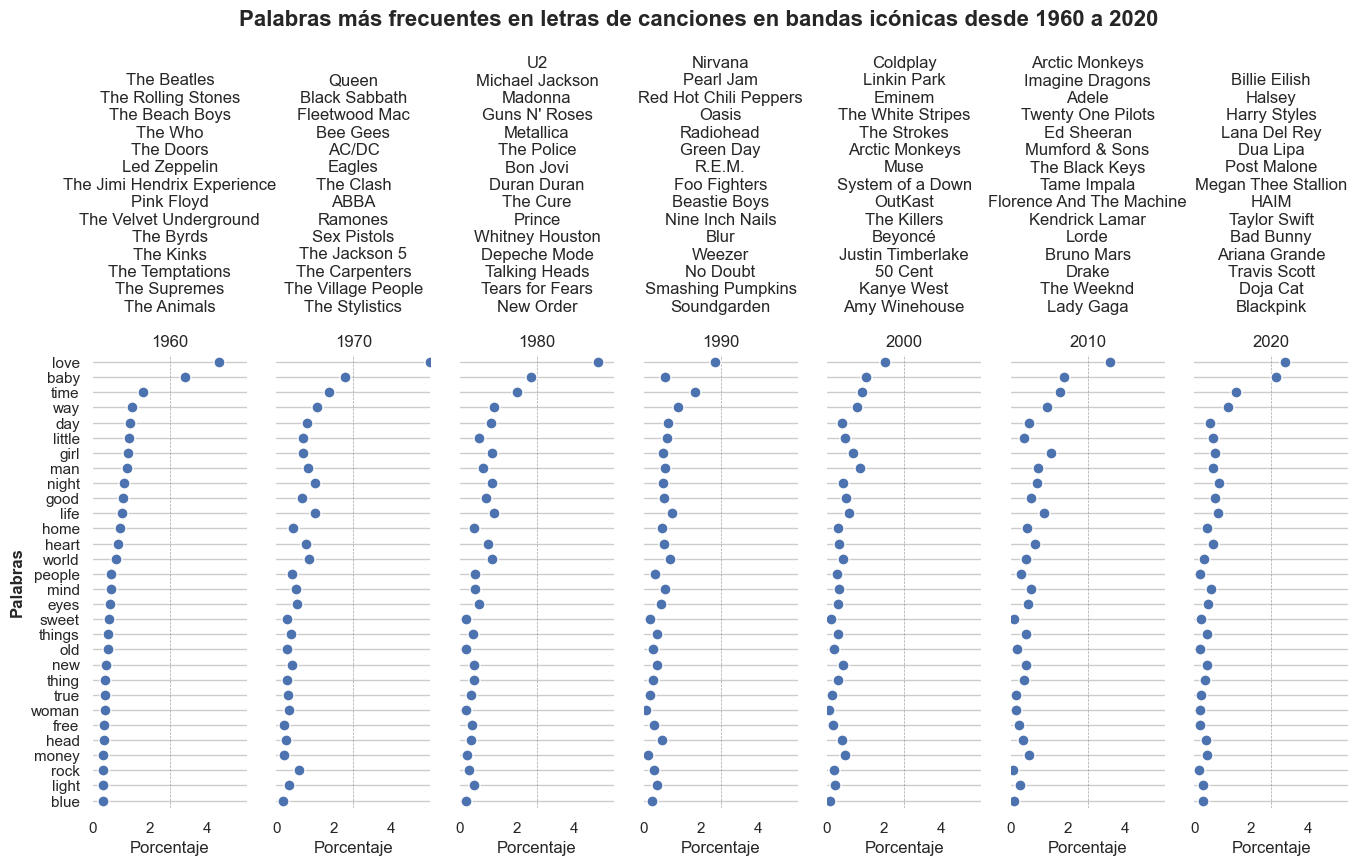

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las primeras palabras para un gráfico más claro (puedes ajustar el número según sea necesario)
top_words = percentage_df.head(30)

# Configurar el tema de seaborn
sns.set_theme(style="whitegrid")

# Crear el PairGrid
g = sns.PairGrid(top_words.sort_values("total_1960", ascending=False),
                 x_vars=top_words.columns[:-1], y_vars=["palabra"],
                 height=15, aspect=.13)

# Dibujar un gráfico de puntos usando stripplot
g.map(sns.stripplot, size=8, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Ajustar límites del eje x y etiquetas
g.set(xlim=(0, top_words.iloc[:, :-1].max().max()), xlabel="Porcentaje")

# Usar títulos semánticos para las columnas
titles = ["\nThe Beatles\nThe Rolling Stones\nThe Beach Boys\nThe Who\nThe Doors\nLed Zeppelin\nThe Jimi Hendrix Experience\nPink Floyd\nThe Velvet Underground\nThe Byrds\nThe Kinks\nThe Temptations\nThe Supremes\nThe Animals\n\n1960", 
        "\nQueen\nBlack Sabbath\nFleetwood Mac\nBee Gees\nAC/DC\nEagles\nThe Clash\nABBA\nRamones\nSex Pistols\nThe Jackson 5\nThe Carpenters\nThe Village People\nThe Stylistics\n\n1970",
        "\nU2\nMichael Jackson\nMadonna\nGuns N' Roses\nMetallica\nThe Police\nBon Jovi\nDuran Duran\nThe Cure\nPrince\nWhitney Houston\nDepeche Mode\nTalking Heads\nTears for Fears\nNew Order\n\n1980",
        "\nNirvana\nPearl Jam\nRed Hot Chili Peppers\nOasis\nRadiohead\nGreen Day\nR.E.M.\nFoo Fighters\nBeastie Boys\nNine Inch Nails\nBlur\nWeezer\nNo Doubt\nSmashing Pumpkins\nSoundgarden\n\n1990",
        "\nColdplay\nLinkin Park\nEminem\nThe White Stripes\nThe Strokes\nArctic Monkeys\nMuse\nSystem of a Down\nOutKast\nThe Killers\nBeyoncé\nJustin Timberlake\n50 Cent\nKanye West\nAmy Winehouse\n\n2000",
        "\nArctic Monkeys\nImagine Dragons\nAdele\nTwenty One Pilots\nEd Sheeran\nMumford & Sons\nThe Black Keys\nTame Impala\nFlorence And The Machine\nKendrick Lamar\nLorde\nBruno Mars\nDrake\nThe Weeknd\nLady Gaga\n\n2010", 
        "\nBillie Eilish\nHalsey\nHarry Styles\nLana Del Rey\nDua Lipa\nPost Malone\nMegan Thee Stallion\nHAIM\nTaylor Swift\nBad Bunny\nAriana Grande\nTravis Scott\nDoja Cat\nBlackpink\n\n2020"]

for ax, title in zip(g.axes.flat, titles):
    # Establecer un título diferente para cada eje
    ax.set(title=title)
    # Hacer que la cuadrícula sea horizontal en lugar de vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    # Establecer el eje y en negrita
    ax.yaxis.set_label_text("Palabras", weight='bold')
    
    # Agregar una línea vertical que indique la mitad del rango en el eje x
    ax.axvline(x=(top_words.iloc[:, :-1].max().max())/2, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Ajustar los márgenes para mostrar los títulos correctamente
plt.subplots_adjust(top=0.35)
plt.suptitle("Palabras más frecuentes en letras de canciones en bandas icónicas desde 1960 a 2020", fontsize=16, fontweight='bold', y=0.58)

# Eliminar las líneas superiores e izquierdas del gráfico
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()


In [215]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Suponiendo que tienes tu DataFrame 'merged_df' cargado

# Eliminar la columna 'palabra' ya que no es numérica
data = merged_df.drop('palabra', axis=1)

# Escalar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Aplicar PCA para reducir la dimensionalidad a 2 dimensiones para la visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Definir el número de clusters (puedes ajustar esto según tus necesidades)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principal_components)

# Agregar las etiquetas de cluster al DataFrame original
merged_df['cluster'] = kmeans.labels_

# Crear un DataFrame con el resultado del clustering y el nombre de las columnas originales
clustered_df = pd.DataFrame(principal_components, columns=['Componente Principal 1', 'Componente Principal 2'])
clustered_df['cluster'] = kmeans.labels_
clustered_df = pd.concat([merged_df['palabra'], clustered_df], axis=1)

print(clustered_df.head())


  palabra  Componente Principal 1  Componente Principal 2  cluster
0    love              301.964347               67.765828        3
1    baby              176.483899               32.293931        1
2    time              145.000207               14.885465        1
3     way              107.908838                7.400394        1
4     day               72.320201                7.611187        2


In [217]:
# Agrupar las palabras por clusters
clusters_grouped = clustered_df.groupby('cluster')['palabra'].apply(list)

# Mostrar las palabras agrupadas por clusters
for cluster, words in clusters_grouped.items():
    print(f"Cluster {cluster}: {words}")

Cluster 0: ['strange', 'children', 'dear', 'blues', 'news', 'glad', 'guy', 'bright', 'number', 'great', 'green', 'poor', 'stone', 'loop', 'river', 'warm', 'earth', 'shoes', 'window', 'sister', 'memories', 'tear', 'wife', 'school', 'joy', 'brother', 'miles', 'band', 'blind', 'wings', 'funny', 'sight', 'mess', 'magic', 'mountain', 'tree', 'women', 'shame', 'radio', 'brain', 'diddley', 'surfin', 'wine', 'tea', 'queen', 'rockin', 'clothes', 'wah', 'nights', 'trouble', 'dawn', 'bells', 'lips', 'clear', 'business', 'ball', 'streets', 'monkey', 'bird', 'share', 'wonderful', 'instrumental', 'yesterday', 'oop', 'minute', 'drip', 'happiness', 'ways', 'flowers', 'evening', 'silver', 'animal', 'highway', 'country', 'wise', 'trees', 'tune', 'winter', 'fade', 'walkin', 'hearts', 'freedom', 'hours', 'rich', 'proud', 'nose', 'hill', 'waves', 'oooo', 'insane', 'snow', 'picture', 'cat', 'doctor', 'luck', 'lucky', 'week', 'story', 'space', 'evil', 'folks', 'guys', 'sugar', 'fever', 'book', 'romance', 'an

In [218]:
# Crear un DataFrame con las palabras agrupadas por clusters
clusters_df = clusters_grouped.reset_index()
clusters_df.columns = ['Cluster', 'Palabras']

clusters_df

   Cluster                                           Palabras
0        0  [strange, children, dear, blues, news, glad, g...
1        1          [baby, time, way, girl, man, night, life]
2        2  [day, little, good, home, heart, world, people...
3        3                                             [love]
4        4  [sweet, old, true, woman, free, rock, blue, pl...


,Cluster,Palabras
0,0,"[strange, children, dear, blues, news, glad, g..."
1,1,"[baby, time, way, girl, man, night, life]"
2,2,"[day, little, good, home, heart, world, people..."
3,3,[love]
4,4,"[sweet, old, true, woman, free, rock, blue, pl..."


In [224]:
clusters_df = clusters_df.iloc[:1001]


In [225]:
clusters_df

,Cluster,Palabras
0,0,"[strange, children, dear, blues, news, glad, g..."
1,1,"[baby, time, way, girl, man, night, life]"
2,2,"[day, little, good, home, heart, world, people..."
3,3,[love]
4,4,"[sweet, old, true, woman, free, rock, blue, pl..."
